In [1]:
# read dataset and visualize first rows
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('crime_csv_all_years.csv')
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2003,6,2,16.0,30.0,8XX RICHARDS ST,Central Business District,491347.04,5458514.73
1,Theft of Vehicle,2003,9,12,23.0,0.0,10XX E 54TH AVE,Sunset,493799.39,5451973.70
2,Other Theft,2003,6,29,15.0,45.0,65XX FRASER ST,Sunset,493394.25,5452440.64
3,Theft from Vehicle,2003,8,27,18.0,0.0,8XX BURRARD ST,Central Business District,491066.19,5458945.81
4,Break and Enter Residential/Other,2003,11,13,13.0,36.0,22XX E PENDER ST,Grandview-Woodland,495705.71,5458615.07


In [2]:
df_tfv = df.loc[df['TYPE']=='Theft from Vehicle'].copy()
df_tfv['HUNDRED_BLOCK'].unique().size

14559

### UTM to Latitude and Longitude  
The values on the dataset are coordinates for utm 10u, but most map plotting frameworks use lat and lon

In [3]:
import utm

lat = []
lon = []
for idx, value in enumerate(df_tfv['X']):
    x, y = utm.to_latlon(value, df_tfv.iloc[idx,-1], 10, 'U')
    lat.append(x)
    lon.append(y)
    
df_tfv['lat'] = lat
df_tfv['lon'] = lon

In [4]:
df_tfv.tail()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,lat,lon
599967,Theft from Vehicle,2019,2,13,11.0,30.0,39XX POINT GREY RD,West Point Grey,486116.68,5457633.85,49.271306,-123.190851
599969,Theft from Vehicle,2019,4,2,14.0,0.0,18XX CHARLES ST,Grandview-Woodland,495085.09,5457805.25,49.272986,-123.067566
599973,Theft from Vehicle,2019,2,3,18.0,0.0,E HASTINGS ST / MAIN ST,Strathcona,492749.79,5458737.38,49.281347,-123.099687
599975,Theft from Vehicle,2019,3,22,10.0,5.0,8XX HAMILTON ST,Central Business District,491524.90,5458410.93,49.278395,-123.116522
599976,Theft from Vehicle,2019,3,22,8.0,49.0,8XX HAMILTON ST,Central Business District,491524.90,5458410.93,49.278395,-123.116522


### GeoPandas

In [5]:
import geopandas as gpd

bnd = 'city_boundary.shp'
bnd_df = gpd.read_file(bnd)

ps = 'public_streets.shp'
ps_df = gpd.read_file(ps)

ps_df.head()

,USE,HBLOCK,geometry
0,Residential,1500 W 59TH AV,"LINESTRING Z (489740.462 5451651.429 0, 489739..."
1,Residential,1500 W 60TH AV,"LINESTRING Z (489738.529 5451566.687 0, 489555..."
2,Residential,7500 ADERA ST,"LINESTRING Z (489523.697 5451664.462 0, 489523..."
3,Residential,2200 W 19TH AV,"LINESTRING Z (488676.124 5455852.911 0, 488503..."
4,Residential,2300 W 23RD AV,"LINESTRING Z (488493.179 5455455.665 0, 488358..."


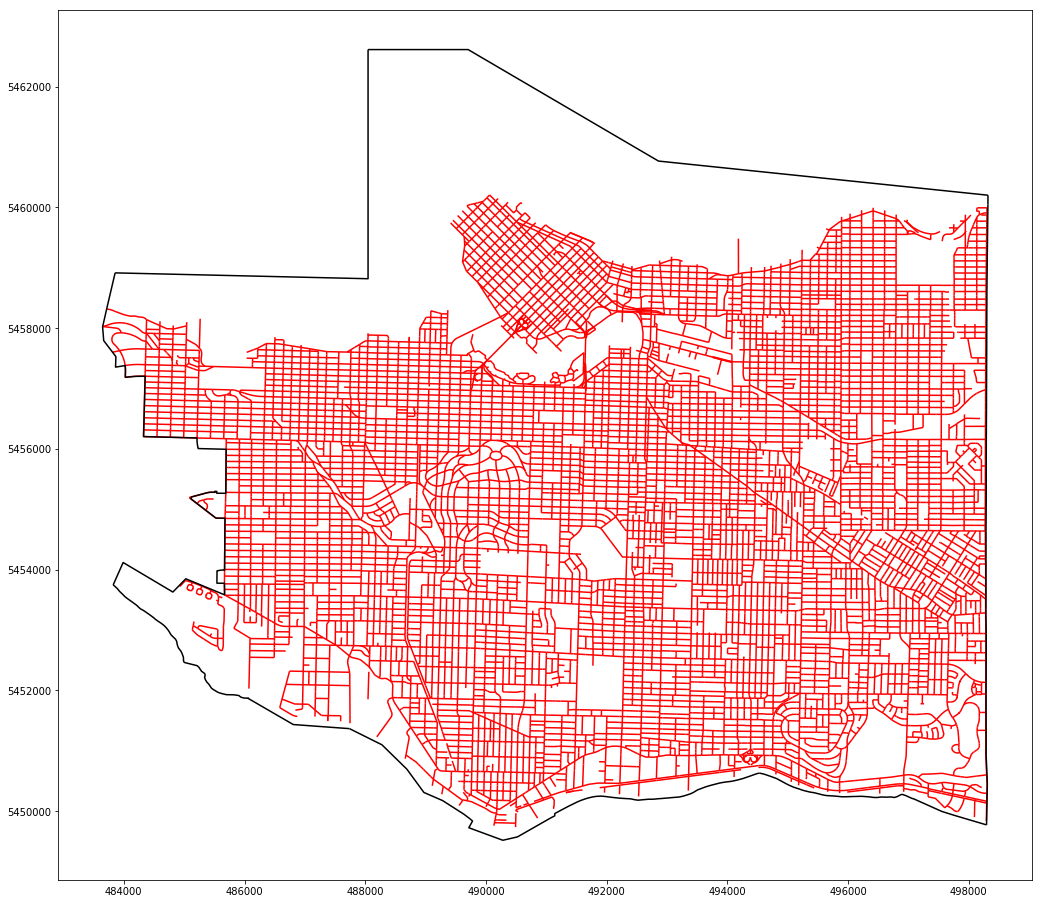

In [6]:
fig, ax = plt.subplots(1, figsize=(40, 16))
ps_df.plot(color='Red', ax=ax)
bnd_df.plot(color='black', ax=ax)

In [8]:
import string
# function to check if a text contain only letters
def is_number(text):
    try:
        int(text)
        return True
    except:
        return False

count_list = []

for idx, value in enumerate(ps_df['HBLOCK']):
    temp = str(value).split(' ')
    clean = value
    if(is_number(temp[0])):
        text = temp[1:]
        clean = ' '.join(text)

    temp = df_tfv['HUNDRED_BLOCK'].str.contains(clean, regex=False).tolist()
    count_list.append(temp.count(True))

count_list[:5]

[174, 93, 147, 375, 256]

In [ ]:
count_list = [int(i) for i in count_list][:-1]
df_count = pd.DataFrame(count_list)
df_count.columns = ['count']
merged = ps_df.join(df_count)

merged.head()

In [ ]:
merged.loc[merged['count'].idxmax()]
vmin = 0
vmax = 6000

In [ ]:
fig, ax = plt.subplots(1, figsize=(40, 16))
# background color
fig.patch.set_facecolor('xkcd:grey')

merged.plot(column='count',cmap='Oranges', ax=ax, edgecolor='0.8',vmin=vmin, vmax=vmax)

# Create colorbar
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)



ax.set_title('NUMBER OF THEFTS FROM VEHICLE FROM 2003 TO 2018', fontdict = {
            'fontsize': 24,
            'fontweight' : 2,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'})
ax.axis('off')
plt.savefig('streets.png')
#bnd_df.plot(color='black', ax=ax)

### plot.ly

In [ ]:
df_cor = df_tfv.loc[df_tfv['YEAR'] == 2013].copy()
size = np.ones(df_cor.shape[0])

In [ ]:
c = df_cor[['lat','lon']].copy()
c['count'] = size
c = c.groupby(['lat','lon']).count().reset_index()

counter = c['count'].values.tolist()
latitude = c['lat'].values.tolist()
longitude = c['lon'].values.tolist()

In [18]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='YOUR_USERNAME', api_key='YOUR_KEY')
mapbox_access_token = 'YOUR_ACCESS_TOKEN'

In [27]:
from IPython.display import IFrame
IFrame(src= "https://dash-simple-apps.plotly.host/dash-scattermapboxplot/", width="100%", height="850px", frameBorder="1")

data = [
    go.Scattermapbox(
        lat=latitude,
        lon=longitude,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=counter,
            color = 'rgba(163,22,19,0.8)',

        ),
        text=counter,
    )
]

layout = go.Layout(
    autosize=False,
    width=950,
    height=800,
    hovermode='closest',
    showlegend=False,
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=49.26,
            lon=-123.14
        ),
        pitch=0,
        zoom=11,
        style='light'
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Vancouver Mapbox')

### Others  

Trying to clean the 'block' columns so instead of plotting streets I can plot just the intersection where the crimes happened 

In [37]:
import string

def is_number(text):
    flag = True
    letters = string.ascii_letters
    for v in letters:
        if v in text:
            flag = False
    return flag

block_list = []
geometry = []
for idx, value in enumerate(ps_df['HBLOCK']):
    clean = str(value).split(' ')
    number = clean[0]
    text = clean[1:]
    text = ' '.join(text)
    if(is_number(number)):
        clean = []
        size = len(number)
        if size<5 and size>1:
            clean.append(number[:-2]+'XX')
            #print(clean)
        elif size>6:
            temp = number.split('-')
            s = int(temp[0][:-2])
            e = int(temp[1][:-2])
            while s <= e:
                clean.append(str(s)+'XX')
                s += 1
            #print(clean)
        else:
            counter = 1
            while(counter<10):
                clean.append(str(counter)+'X')
                counter +=1
            clean.append('1XX')
            #print(clean)
        for i, n in enumerate(clean):
            block_list.append(n+' '+text)
            geometry.append(ps_df['geometry'].iloc[idx])
    else:
        block_list.append(value)
        geometry.append(ps_df['geometry'].iloc[idx])
            
new_map = pd.DataFrame(block_list)
new_map['geometry'] = geometry
new_map.head()
new_map.columns = ['block', 'geometry']
#ps_df['HBLOCK'][:10]